<a href="https://colab.research.google.com/github/DilshanBotheju/CSACP_Project/blob/main/CrimeType_and_Time_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preprocessing**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

Crime Dataset

In [ ]:
#Load relevant datasets
crime_data_path = "/content/drive/MyDrive/DSGP/Baltimore_Part1_Crime_data.csv"
crime_data = pd.read_csv(crime_data_path, encoding = "latin-1")
crime_data.head()

,ï»¿X,Y,RowID,CrimeDateTime,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,VRIName,Total_Incidents,Shape
0,1.442562e+06,590731.068662,1,2022/04/01 09:31:00+00,6G,6300 EASTERN AVE,LARCENY,NaN,NaN,232,SOUTHEAST,BAYVIEW,39.2878,-76.5399,"(39.2878,-76.5399)",NaN,NaN,1,NaN
1,1.425428e+06,599464.931734,2,2022/04/01 11:00:00+00,6J,1300 E NORTH AVE,LARCENY,NaN,NaN,312,EASTERN,EAST BALTIMORE MIDWAY,39.3120,-76.6003,"(39.312,-76.6003)",NaN,Eastern 1,1,NaN
2,1.417097e+06,588539.130322,3,2022/04/01 00:01:00+00,6D,800 CARROLL ST,LARCENY FROM AUTO,NaN,NaN,932,SOUTHERN,WASHINGTON VILLAGE/PIGTOWN,39.2821,-76.6299,"(39.2821,-76.6299)",NaN,NaN,1,NaN
3,1.431878e+06,587437.730818,4,2022/04/01 18:00:00+00,6F,2700 LIGHTHOUSE PT E,LARCENY,NaN,NaN,214,SOUTHEAST,CANTON,39.2789,-76.5777,"(39.2789,-76.5777)",NaN,NaN,1,NaN
4,1.433804e+06,593238.069583,5,2022/04/01 21:00:00+00,3GF,3300 E FAYETTE ST,ROBBERY - COMMERCIAL,NaN,HANDGUN,222,SOUTHEAST,PATTERSON PARK NEIGHBORHOOD,39.2948,-76.5708,"(39.2948,-76.5708)",NaN,NaN,1,NaN


In [ ]:
# Identifying shape of the dataset
crime_data.shape

(516635, 19)

In [ ]:
# Analyisng crime dataset
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516635 entries, 0 to 516634
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ï»¿X             515747 non-null  float64
 1   Y                515747 non-null  float64
 2   RowID            516635 non-null  int64  
 3   CrimeDateTime    516635 non-null  object 
 4   CrimeCode        516635 non-null  object 
 5   Location         514081 non-null  object 
 6   Description      516635 non-null  object 
 7   Inside_Outside   442718 non-null  object 
 8   Weapon           107334 non-null  object 
 9   Post             514896 non-null  object 
 10  District         514896 non-null  object 
 11  Neighborhood     514865 non-null  object 
 12  Latitude         515747 non-null  float64
 13  Longitude        515747 non-null  float64
 14  GeoLocation      516635 non-null  object 
 15  Premise          442382 non-null  object 
 16  VRIName          60400 non-null   obje

In [ ]:
crime_codes_path = "/content/drive/MyDrive/DSGP/BALTIMORE_CRIME_CODES.csv"
crime_codes = pd.read_csv(crime_codes_path, encoding = "latin-1")
crime_codes.head()

,CODE,TYPE,NAME,CLASS,NAME_COMBINE,WEAPON,VIOLENT_CR,VIO_PROP_CFS
0,13,CTYP,ASSIST OFFICER,CFS,ASSIST OFFICER,NaN,NaN,OTHER
1,1A,CTYP,MURDER,PART 1,HOMICIDE,OTHER,HOMICIDE,VIOLENT
2,1F,CTYP,MURDER,PART 1,HOMICIDE,FIREARM,HOMICIDE,VIOLENT
3,1K,CTYP,MURDER,PART 1,HOMICIDE,KNIFE,HOMICIDE,VIOLENT
4,1O,CTYP,MURDER,PART 1,HOMICIDE,OTHER,HOMICIDE,VIOLENT


In [ ]:
crime_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CODE          203 non-null    object
 1   TYPE          203 non-null    object
 2   NAME          202 non-null    object
 3   CLASS         202 non-null    object
 4   NAME_COMBINE  202 non-null    object
 5   WEAPON        45 non-null     object
 6   VIOLENT_CR    103 non-null    object
 7   VIO_PROP_CFS  203 non-null    object
dtypes: object(8)
memory usage: 12.8+ KB


In [ ]:
# Drop unnecessary columns from crime codes dataset
crime_codes = crime_codes.drop(["TYPE","CLASS","WEAPON","VIOLENT_CR","VIO_PROP_CFS"],axis=1,errors="ignore")
crime_codes.head(20)

,CODE,NAME,NAME_COMBINE
0,13,ASSIST OFFICER,ASSIST OFFICER
1,1A,MURDER,HOMICIDE
2,1F,MURDER,HOMICIDE
3,1K,MURDER,HOMICIDE
4,1O,MURDER,HOMICIDE
5,20A,FOLLOWUP,FOLLOWUP
6,20B,FOOT PATROL,FOOT PATROL
7,20C,BANK CHECK,BANK CHECK
8,20D,DETAIL,DETAIL
9,20E,COURT,COURT


In [ ]:
#Renaming column names
crime_codes = crime_codes.rename(columns={"CODE": "CrimeCode", "NAME": "CrimeName"})

# Merge the datasets to map codes to names
crime_merged_data = pd.merge(crime_data, crime_codes[["CrimeCode", "CrimeName"]], on="CrimeCode", how="left")
crime_merged_data.head(10)

,ï»¿X,Y,RowID,CrimeDateTime,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,VRIName,Total_Incidents,Shape,CrimeName
0,1.442562e+06,590731.068662,1,2022/04/01 09:31:00+00,6G,6300 EASTERN AVE,LARCENY,NaN,NaN,232,SOUTHEAST,BAYVIEW,39.2878,-76.5399,"(39.2878,-76.5399)",NaN,NaN,1,NaN,LARCENY- FROM BLDG.
1,1.425428e+06,599464.931734,2,2022/04/01 11:00:00+00,6J,1300 E NORTH AVE,LARCENY,NaN,NaN,312,EASTERN,EAST BALTIMORE MIDWAY,39.3120,-76.6003,"(39.312,-76.6003)",NaN,Eastern 1,1,NaN,LARCENY- OTHER
2,1.417097e+06,588539.130322,3,2022/04/01 00:01:00+00,6D,800 CARROLL ST,LARCENY FROM AUTO,NaN,NaN,932,SOUTHERN,WASHINGTON VILLAGE/PIGTOWN,39.2821,-76.6299,"(39.2821,-76.6299)",NaN,NaN,1,NaN,LARCENY- FROM AUTO
3,1.431878e+06,587437.730818,4,2022/04/01 18:00:00+00,6F,2700 LIGHTHOUSE PT E,LARCENY,NaN,NaN,214,SOUTHEAST,CANTON,39.2789,-76.5777,"(39.2789,-76.5777)",NaN,NaN,1,NaN,LARCENY- BICYCLE
4,1.433804e+06,593238.069583,5,2022/04/01 21:00:00+00,3GF,3300 E FAYETTE ST,ROBBERY - COMMERCIAL,NaN,HANDGUN,222,SOUTHEAST,PATTERSON PARK NEIGHBORHOOD,39.2948,-76.5708,"(39.2948,-76.5708)",NaN,NaN,1,NaN,ROBB CONV STORE FIREARM
5,1.421453e+06,595987.574926,6,2022/04/01 13:00:00+00,6C,1100 ST PAUL ST,LARCENY,NaN,BLUNT_OBJECT,134,CENTRAL,MID-TOWN BELVEDERE,39.3025,-76.6144,"(39.3025,-76.6144)",NaN,NaN,1,NaN,LARCENY- SHOPLIFTING
6,1.429813e+06,593510.999632,7,2022/04/01 16:33:00+00,4E,2300 ORLEANS ST,COMMON ASSAULT,NaN,BLUNT_OBJECT,321,EASTERN,MCELDERRY PARK,39.2956,-76.5849,"(39.2956,-76.5849)",NaN,NaN,1,NaN,COMMON ASSAULT
7,1.429813e+06,593510.999632,8,2022/04/01 16:33:00+00,4B,2300 ORLEANS ST,AGG. ASSAULT,NaN,BLUNT_OBJECT,321,EASTERN,MCELDERRY PARK,39.2956,-76.5849,"(39.2956,-76.5849)",NaN,NaN,1,NaN,AGG. ASSLT.- CUT
8,1.421673e+06,590852.770018,9,2022/04/01 16:23:00+00,4E,0 LIGHT ST,COMMON ASSAULT,NaN,NaN,111,CENTRAL,DOWNTOWN,39.2884,-76.6137,"(39.2884,-76.6137)",NaN,NaN,1,NaN,COMMON ASSAULT
9,1.435084e+06,592005.710649,10,2022/04/01 20:58:00+00,4E,3700 E LOMBARD ST,COMMON ASSAULT,NaN,PERSONAL_WEAPONS,223,SOUTHEAST,BALTIMORE HIGHLANDS,39.2914,-76.5663,"(39.2914,-76.5663)",NaN,NaN,1,NaN,COMMON ASSAULT


In [ ]:
#Ansalyse merged dataset
crime_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516635 entries, 0 to 516634
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ï»¿X             515747 non-null  float64
 1   Y                515747 non-null  float64
 2   RowID            516635 non-null  int64  
 3   CrimeDateTime    516635 non-null  object 
 4   CrimeCode        516635 non-null  object 
 5   Location         514081 non-null  object 
 6   Description      516635 non-null  object 
 7   Inside_Outside   442718 non-null  object 
 8   Weapon           107334 non-null  object 
 9   Post             514896 non-null  object 
 10  District         514896 non-null  object 
 11  Neighborhood     514865 non-null  object 
 12  Latitude         515747 non-null  float64
 13  Longitude        515747 non-null  float64
 14  GeoLocation      516635 non-null  object 
 15  Premise          442382 non-null  object 
 16  VRIName          60400 non-null   obje

In [ ]:
#Identifying null value count
crime_merged_data.isnull().sum()

,0
ï»¿X,888
Y,888
RowID,0
CrimeDateTime,0
CrimeCode,0
Location,2554
Description,0
Inside_Outside,73917
Weapon,409301
Post,1739


In [ ]:
# Replace NaN as Unknown
crime_merged_data.replace(np.nan, "Unknown", inplace=True)

In [ ]:
#Seperating time and date into two columns
crime_merged_data['CrimeDate'] = pd.to_datetime(crime_merged_data["CrimeDateTime"], errors="coerce").dt.date
crime_merged_data['CrimeTime'] = pd.to_datetime(crime_merged_data["CrimeDateTime"], errors="coerce").dt.time

crime_merged_data.head()

,ï»¿X,Y,RowID,CrimeDateTime,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,...,Latitude,Longitude,GeoLocation,Premise,VRIName,Total_Incidents,Shape,CrimeName,CrimeDate,CrimeTime
0,1442562.392676,590731.068662,1,2022/04/01 09:31:00+00,6G,6300 EASTERN AVE,LARCENY,Unknown,Unknown,232,...,39.2878,-76.5399,"(39.2878,-76.5399)",Unknown,Unknown,1,Unknown,LARCENY- FROM BLDG.,2022-04-01,09:31:00
1,1425428.077606,599464.931734,2,2022/04/01 11:00:00+00,6J,1300 E NORTH AVE,LARCENY,Unknown,Unknown,312,...,39.312,-76.6003,"(39.312,-76.6003)",Unknown,Eastern 1,1,Unknown,LARCENY- OTHER,2022-04-01,11:00:00
2,1417097.033148,588539.130322,3,2022/04/01 00:01:00+00,6D,800 CARROLL ST,LARCENY FROM AUTO,Unknown,Unknown,932,...,39.2821,-76.6299,"(39.2821,-76.6299)",Unknown,Unknown,1,Unknown,LARCENY- FROM AUTO,2022-04-01,00:01:00
3,1431878.41635,587437.730818,4,2022/04/01 18:00:00+00,6F,2700 LIGHTHOUSE PT E,LARCENY,Unknown,Unknown,214,...,39.2789,-76.5777,"(39.2789,-76.5777)",Unknown,Unknown,1,Unknown,LARCENY- BICYCLE,2022-04-01,18:00:00
4,1433804.421945,593238.069583,5,2022/04/01 21:00:00+00,3GF,3300 E FAYETTE ST,ROBBERY - COMMERCIAL,Unknown,HANDGUN,222,...,39.2948,-76.5708,"(39.2948,-76.5708)",Unknown,Unknown,1,Unknown,ROBB CONV STORE FIREARM,2022-04-01,21:00:00


In [ ]:
#Identifying null count for each column
crime_merged_data.isnull().sum()

,0
ï»¿X,0
Y,0
RowID,0
CrimeDateTime,0
CrimeCode,0
Location,0
Description,0
Inside_Outside,0
Weapon,0
Post,0


In [ ]:
# Replacing null values as Unknown
crime_merged_data= crime_merged_data.fillna("Unknown")


In [ ]:
# Find duplicate rows
duplicate_rows = crime_merged_data[crime_merged_data.duplicated()]

# Print the duplicate rows
print("Duplicate rows:")
print(duplicate_rows)

# Count the number of duplicate rows
print(f"\nNumber of duplicate rows: {len(duplicate_rows)}")


Duplicate rows:
Empty DataFrame
Columns: [ï»¿X, Y, RowID, CrimeDateTime, CrimeCode, Location, Description, Inside_Outside, Weapon, Post, District, Neighborhood, Latitude, Longitude, GeoLocation, Premise, VRIName, Total_Incidents, Shape, CrimeName, CrimeDate, CrimeTime]
Index: []

[0 rows x 22 columns]

Number of duplicate rows: 0


In [ ]:
# Categories for premises
crime_merged_data["Premise"].value_counts()

,count
Premise,
STREET,160900
ROW/TOWNHOUSE-OCC,97879
Unknown,74253
APT/CONDO - OCCUPIED,21148
OTHER - INSIDE,17495
...,...
BAKERY,1
MARKET STALLS,1
DOCTORS OFFICE,1


In [ ]:
# Summarizing Crime Time to lie between an hour
crime_merged_data["CrimeTime"].value_counts()

,count
CrimeTime,
18:00:00,11793
17:00:00,11554
12:00:00,10644
16:00:00,10623
20:00:00,10424
...,...
14:43:20,1
20:08:47,1
23:11:37,1


In [ ]:
from datetime import datetime, timedelta

# Function to convert time to a 1-hour range
def time_to_range(time_obj):
    try:
        # Convert the time object to a string
        time_str = str(time_obj)

        # Parse the string to a datetime object
        time = datetime.strptime(time_str, "%H:%M:%S")

        # Get the start and end times of the range
        start_time = time.replace(minute=0, second=0)
        end_time = start_time + timedelta(hours=1)
        return f"{start_time.time()} - {end_time.time()}"
    except ValueError:
        return time_str

# Apply the function
crime_merged_data["Time_Range"] = crime_merged_data["CrimeTime"].astype(str).apply(time_to_range)


In [ ]:
def get_season(date_str):
    try:
        date = pd.to_datetime(date_str, errors="coerce")

        month = date.month
        if month in [3, 4, 5]:
            return "Spring"
        elif month in [6, 7, 8]:
            return "Summer"
        elif month in [9, 10, 11]:
            return "Autumn"
        else:
            return "Winter"
    except Exception as e:
        return "Unknown"

# Apply function to dataset
crime_merged_data["Season"] = crime_merged_data["CrimeDate"].apply(get_season)

In [ ]:
# Renaming Inside_Outside column
crime_merged_data = crime_merged_data.rename(columns={"Inside_Outside": "Inside/Outside"})
crime_merged_data.head()

,ï»¿X,Y,RowID,CrimeDateTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,...,GeoLocation,Premise,VRIName,Total_Incidents,Shape,CrimeName,CrimeDate,CrimeTime,Time_Range,Season
0,1442562.392676,590731.068662,1,2022/04/01 09:31:00+00,6G,6300 EASTERN AVE,LARCENY,Unknown,Unknown,232,...,"(39.2878,-76.5399)",Unknown,Unknown,1,Unknown,LARCENY- FROM BLDG.,2022-04-01,09:31:00,09:00:00 - 10:00:00,Spring
1,1425428.077606,599464.931734,2,2022/04/01 11:00:00+00,6J,1300 E NORTH AVE,LARCENY,Unknown,Unknown,312,...,"(39.312,-76.6003)",Unknown,Eastern 1,1,Unknown,LARCENY- OTHER,2022-04-01,11:00:00,11:00:00 - 12:00:00,Spring
2,1417097.033148,588539.130322,3,2022/04/01 00:01:00+00,6D,800 CARROLL ST,LARCENY FROM AUTO,Unknown,Unknown,932,...,"(39.2821,-76.6299)",Unknown,Unknown,1,Unknown,LARCENY- FROM AUTO,2022-04-01,00:01:00,00:00:00 - 01:00:00,Spring
3,1431878.41635,587437.730818,4,2022/04/01 18:00:00+00,6F,2700 LIGHTHOUSE PT E,LARCENY,Unknown,Unknown,214,...,"(39.2789,-76.5777)",Unknown,Unknown,1,Unknown,LARCENY- BICYCLE,2022-04-01,18:00:00,18:00:00 - 19:00:00,Spring
4,1433804.421945,593238.069583,5,2022/04/01 21:00:00+00,3GF,3300 E FAYETTE ST,ROBBERY - COMMERCIAL,Unknown,HANDGUN,222,...,"(39.2948,-76.5708)",Unknown,Unknown,1,Unknown,ROBB CONV STORE FIREARM,2022-04-01,21:00:00,21:00:00 - 22:00:00,Spring


In [ ]:
crime_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516635 entries, 0 to 516634
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ï»¿X             516635 non-null  object
 1   Y                516635 non-null  object
 2   RowID            516635 non-null  int64 
 3   CrimeDateTime    516635 non-null  object
 4   CrimeCode        516635 non-null  object
 5   Location         516635 non-null  object
 6   Description      516635 non-null  object
 7   Inside/Outside   516635 non-null  object
 8   Weapon           516635 non-null  object
 9   Post             516635 non-null  object
 10  District         516635 non-null  object
 11  Neighborhood     516635 non-null  object
 12  Latitude         516635 non-null  object
 13  Longitude        516635 non-null  object
 14  GeoLocation      516635 non-null  object
 15  Premise          516635 non-null  object
 16  VRIName          516635 non-null  object
 17  Total_Inci

In [ ]:
# Dropping unnecessary columns
crime_merged_data = crime_merged_data.drop(["ï»¿X","CrimeCode","Y","RowID","CrimeTime","CrimeDate","Total_Incidents","Weapon","Post","Location","CrimeDateTime","Latitude","Longitude","GeoLocation","VRIName","Shape"],axis=1,errors="ignore")
crime_merged_data.head(10)

,Description,Inside/Outside,District,Neighborhood,Premise,Total_Incidents,CrimeName,Time_Range,Season
0,LARCENY,Unknown,SOUTHEAST,BAYVIEW,Unknown,1,LARCENY- FROM BLDG.,09:00:00 - 10:00:00,Spring
1,LARCENY,Unknown,EASTERN,EAST BALTIMORE MIDWAY,Unknown,1,LARCENY- OTHER,11:00:00 - 12:00:00,Spring
2,LARCENY FROM AUTO,Unknown,SOUTHERN,WASHINGTON VILLAGE/PIGTOWN,Unknown,1,LARCENY- FROM AUTO,00:00:00 - 01:00:00,Spring
3,LARCENY,Unknown,SOUTHEAST,CANTON,Unknown,1,LARCENY- BICYCLE,18:00:00 - 19:00:00,Spring
4,ROBBERY - COMMERCIAL,Unknown,SOUTHEAST,PATTERSON PARK NEIGHBORHOOD,Unknown,1,ROBB CONV STORE FIREARM,21:00:00 - 22:00:00,Spring
5,LARCENY,Unknown,CENTRAL,MID-TOWN BELVEDERE,Unknown,1,LARCENY- SHOPLIFTING,13:00:00 - 14:00:00,Spring
6,COMMON ASSAULT,Unknown,EASTERN,MCELDERRY PARK,Unknown,1,COMMON ASSAULT,16:00:00 - 17:00:00,Spring
7,AGG. ASSAULT,Unknown,EASTERN,MCELDERRY PARK,Unknown,1,AGG. ASSLT.- CUT,16:00:00 - 17:00:00,Spring
8,COMMON ASSAULT,Unknown,CENTRAL,DOWNTOWN,Unknown,1,COMMON ASSAULT,16:00:00 - 17:00:00,Spring
9,COMMON ASSAULT,Unknown,SOUTHEAST,BALTIMORE HIGHLANDS,Unknown,1,COMMON ASSAULT,20:00:00 - 21:00:00,Spring


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encoding categorical columns
categorical_cols = ["Inside/Outside","District","CrimeName","Premise","Time_Range","Season","Neighborhood"]

# Apply label encoding to each column
for col in categorical_cols:
    crime_merged_data[col] = label_encoder.fit_transform(crime_merged_data[col])

crime_merged_data.head()

,Description,Inside/Outside,District,Neighborhood,Premise,Total_Incidents,CrimeName,Time_Range,Season
0,LARCENY,4,5,9,154,1,28,9,1
1,LARCENY,4,1,69,154,1,31,11,1
2,LARCENY FROM AUTO,4,6,257,154,1,27,0,1
3,LARCENY,4,5,31,154,1,26,18,1
4,ROBBERY - COMMERCIAL,4,5,196,154,1,55,21,1


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Fit-transform description and neighborhood
desc_vectors = tfidf.fit_transform(crime_merged_data["Description"].astype(str))

# Convert to DataFrame
desc_df = pd.DataFrame(desc_vectors.toarray(), columns=tfidf.get_feature_names_out())


# Merge with the main dataset
crime_merged_data = pd.concat([crime_merged_data, desc_df], axis=1)

In [ ]:
crime_merged_data = crime_merged_data.drop(["Description"],axis=1,errors="ignore")
crime_merged_data.head()

,Inside/Outside,District,Neighborhood,Premise,Total_Incidents,CrimeName,Time_Range,Season,agg,arson,...,commercial,common,homicide,larceny,rape,residence,robbery,shooting,street,theft
0,4,5,9,154,1,28,9,1,0.0,0.0,...,0.000000,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,4,1,69,154,1,31,11,1,0.0,0.0,...,0.000000,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,4,6,257,154,1,27,0,1,0.0,0.0,...,0.000000,0.0,0.0,0.627994,0.0,0.0,0.000000,0.0,0.0,0.0
3,4,5,31,154,1,26,18,1,0.0,0.0,...,0.000000,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0
4,4,5,196,154,1,55,21,1,0.0,0.0,...,0.839654,0.0,0.0,0.000000,0.0,0.0,0.543122,0.0,0.0,0.0


In [ ]:
crime_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516635 entries, 0 to 516634
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Inside/Outside   516635 non-null  int64  
 1   District         516635 non-null  int64  
 2   Neighborhood     516635 non-null  int64  
 3   Premise          516635 non-null  int64  
 4   Total_Incidents  516635 non-null  int64  
 5   CrimeName        516635 non-null  int64  
 6   Time_Range       516635 non-null  int64  
 7   Season           516635 non-null  int64  
 8   agg              516635 non-null  float64
 9   arson            516635 non-null  float64
 10  assault          516635 non-null  float64
 11  auto             516635 non-null  float64
 12  burglary         516635 non-null  float64
 13  carjacking       516635 non-null  float64
 14  commercial       516635 non-null  float64
 15  common           516635 non-null  float64
 16  homicide         516635 non-null  floa

Training set size: (413308, 23)
Test set size: (103327, 23)
Scaled data sample:
[[ 0.38321007  0.02329535 -0.39815454  0.56763833  0.          1.29513845
  -0.42526061 -0.35478593 -0.06723556 -0.63947392  2.126592   -0.40924804
  -0.0909122  -0.12857989 -0.46712507 -0.07691952  0.76034376 -0.08318012
  -0.10584433 -0.32933676 -0.10400588 -0.26034721 -0.30352984]
 [-1.03582148  1.16285694 -1.44091763 -2.89000789  0.         -0.31152951
  -1.32815433 -0.35478593 -0.06723556  1.64275148 -0.52159154 -0.40924804
  -0.0909122  -0.12857989  2.14075432 -0.07691952 -0.7167733  -0.08318012
  -0.10584433 -0.32933676 -0.10400588 -0.26034721 -0.30352984]
 [ 0.38321007 -1.49612009  0.55666469  0.56763833  0.         -1.77213676
   1.38052683 -0.35478593 -0.06723556 -0.63947392 -0.52159154 -0.40924804
  -0.0909122  -0.12857989 -0.46712507 -0.07691952 -0.7167733  -0.08318012
  -0.10584433  3.26460114 -0.10400588  3.84102441 -0.30352984]
 [-1.03582148 -0.73641237  1.63711802  0.116641    0.          1.

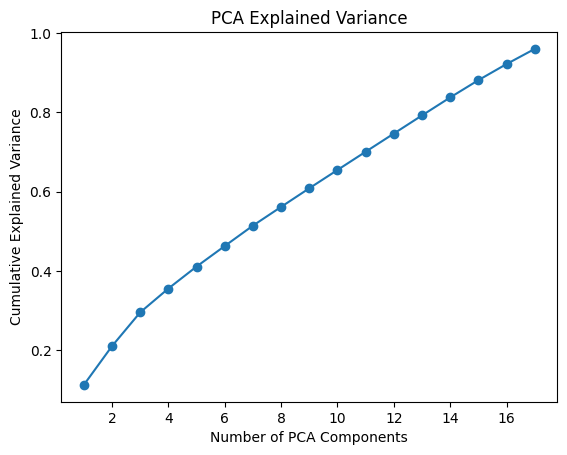

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


X = crime_merged_data.drop(columns=["CrimeName"])
y = crime_merged_data["CrimeName"]

# Split data into train and tes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

print("Scaled data sample:")
print(X_train_scaled[:5])

# Initialize PCA with 95% variance retention
pca = PCA(n_components=0.95)

# Fit and transform the training data
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform the test data
X_test_pca = pca.transform(X_test_scaled)

print("PCA transformed data sample:")
print(X_train_pca[:5])

# Plot the cumulative explained variance
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()



In [ ]:
# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train_pca, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_pca)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7219894122542995

Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.32      0.33      2979
           1       0.41      0.39      0.40      2714
           2       0.19      0.11      0.14      1488
           3       0.45      0.54      0.49      4484
           5       0.60      0.18      0.27        17
           6       0.00      0.00      0.00         1
           7       0.19      0.14      0.16        22
           8       1.00      0.12      0.22         8
           9       0.50      0.11      0.18         9
          10       0.00      0.00      0.00         1
          11       0.28      0.37      0.31        30
          12       0.00      0.00      0.00         1
          13       0.40      0.49      0.44        82
          14       0.29      0.18      0.22        22
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         4
          17       0.31     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_